In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = load_iris()

# Convert dataset to Dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
X = iris.drop(columns=['target'], axis=1)
X = X.iloc[:, 0:2]  # Selecting only two columns
y = iris.target

In [4]:
classifier = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X, y)

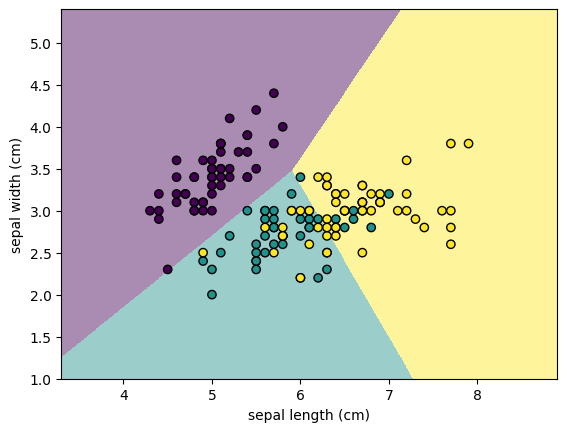

In [5]:
disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="auto",
                                              grid_resolution=1000, plot_method='pcolormesh',
                                              xlabel=X.columns[0], ylabel=X.columns[1],
                                              alpha=0.45, cmap='viridis',
                                              )
disp.ax_.scatter(X.iloc[:, 0:1], X.iloc[:, 1:], c=y, edgecolor="k", cmap='viridis')
plt.show()